#### Exploratory Data Analytics (EDA) terhadap data bank churn

In [1]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
# Read Data bank_churn
bank=pd.read_csv("bank_churn.csv")
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Shape of Data
bank.shape

(10000, 14)

In [7]:
# Finding null count
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#Check Null Values 
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Descriptive analysis
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Analisis Univariat

In [11]:
# Distinct Species values
bank["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
# Dividing data
france = bank.loc[bank['Geography'] == "France"]
spain = bank.loc[bank['Geography'] == "Spain"]
germany = bank.loc[bank['Geography'] == "Germany"]

In [13]:
spain.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0


<AxesSubplot:xlabel='EstimatedSalary'>

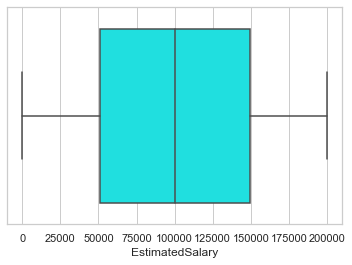

In [16]:
#Ploting the boxplot
sns.boxplot(x = bank['EstimatedSalary'], color='cyan')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

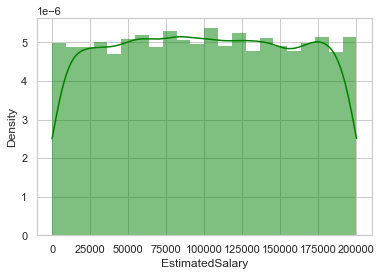

In [19]:
# Ploting the KDE
sns.histplot(data=bank['EstimatedSalary'],  color="green", kde=True, stat="density", linewidth=0) 

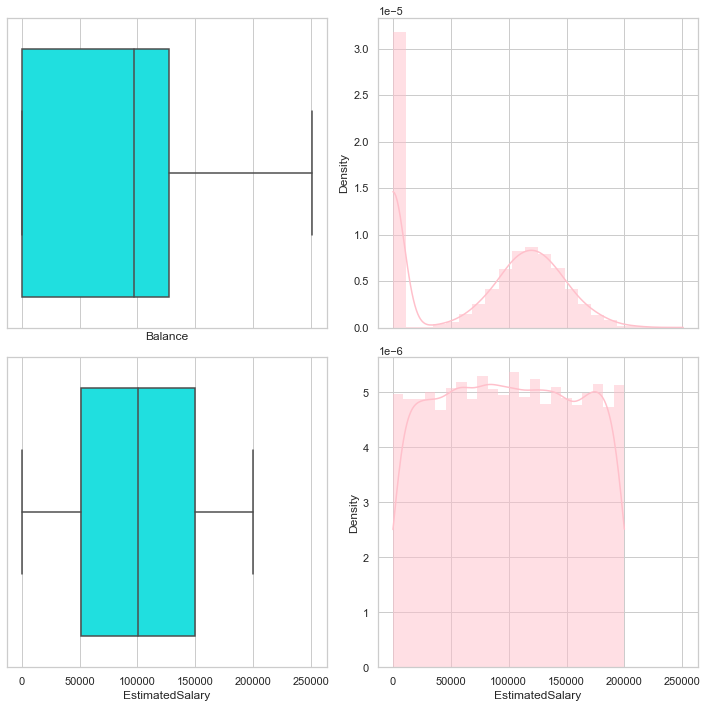

In [25]:
# Setting up subplots
f,axes=plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharex=True)

column=['Balance', 'EstimatedSalary']
for i in range(2):
    
    #Ploting the boxplot
    sns.boxplot(x = bank[column[i]], ax=axes[i][0], color='cyan')
    
    # Ploting the KDE
    sns.histplot(data=bank[column[i]], ax=axes[i][1],  color="pink", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

<AxesSubplot:xlabel='Geography', ylabel='count'>

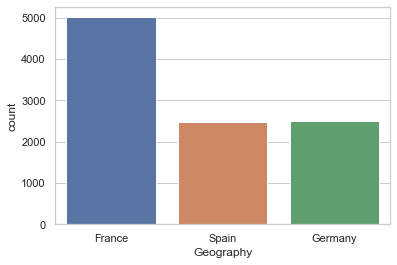

In [26]:
sns.countplot(x=bank['Geography'])

### Analisis Bivariat

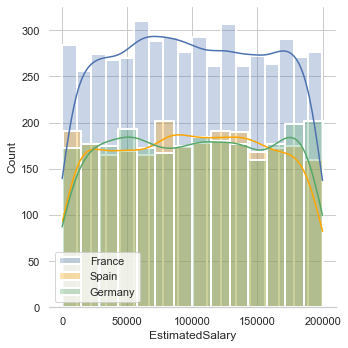

In [28]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #estimated-salary vs geography

# Ploting the histogram with KDE

sns.histplot(data=france["EstimatedSalary"],label="France",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=spain["EstimatedSalary"],label="Spain",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=germany["EstimatedSalary"],label="Germany",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

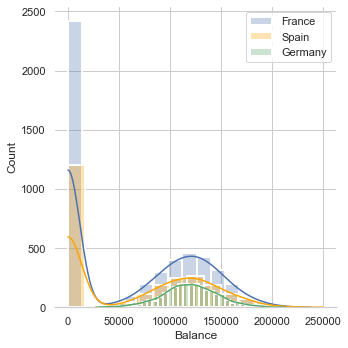

In [29]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #balance vs geography

# Ploting the histogram with KDE

sns.histplot(data=france["Balance"],label="France",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=spain["Balance"],label="Spain",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=germany["Balance"],label="Germany",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

### Analisis Multivariat

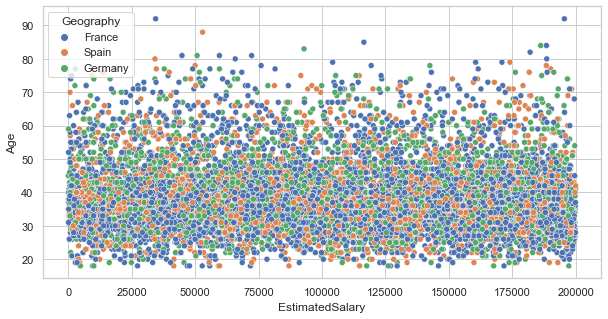

In [33]:
plt.figure(figsize =(10,5))
sns.scatterplot(x='EstimatedSalary',y='Age',hue='Geography',data=bank)
plt.show()